In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
mql_data = pd.read_csv('/home/sidharth/Downloads/mql.csv')
closed_deals = pd.read_csv('/home/sidharth/Downloads/cdd.csv')

In [62]:
sellers = pd.read_csv('/home/sidharth/Downloads/sellers.csv')
geo = pd.read_csv('/home/sidharth/Downloads/geo.csv')

In [94]:
overall_leads = mql_data.merge(closed_deals,how='inner',on='mql_id').merge(sellers,how='inner',on='seller_id')

In [95]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,73f31a40697cc90a86c1273563ac230e,other,f46490624488d3ff7ce78613913a7711,9d12ef1a7eca3ec58c545c678af7869c,068066e24f0c643eb1d089c7dd20cd73,2018-05-16 19:51:05,health_beauty,online_big,eagle,NaN,NaN,NaN,reseller,NaN,0.0,7194,guarulhos,SP
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,b76ef37428e6799c421989521c0e5077,organic_search,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,computers,NaN,NaN,NaN,NaN,NaN,reseller,NaN,0.0,17400,garca,SP
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,email,33dd941c27854f7625b968cc6195a552,a8387c01a09e99ce014107505b92388c,85fc447d336637ba1df43e793199fbc8,2018-03-28 22:42:55,household_utilities,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,29107,vila velha,ES
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,8275,sao paulo,SP


In [111]:
np.random.randn(2,9).shape

(2, 9)

In [155]:
def data_info(df,rem_cols):
    
    df = df.drop(columns=rem_cols)
    
    df_info = pd.DataFrame(np.random.randn(1,9)*12,
                          columns = ['Number of Variables',
                                    'Observations',
                                     'numerical_features',
                                    'categorical_features',
                                    'boolean_features',
                                    'date',
                                    '0% null',
                                    '<30% null',
                                    '>30% null'])
    
    
    df_info.loc[0,'Number of Variables'] = df.shape[1]
    df_info.loc[1,'Number of Variables'] = ','.join(df.columns.to_list())
    
    df_info.loc[0,'Observations'] = df.shape[0]
    df_info.loc[1,'Observations'] = np.nan
    
    df_info.loc[0,'numerical_features'] = df._get_numeric_data().shape[1]
    df_info.loc[1,'numerical_features'] = ','.join(df._get_numeric_data().columns.to_list())
    
    df_info.loc[0,'categorical_features'] = df.select_dtypes(include=['object']).shape[1]
    df_info.loc[1,'categorical_features'] = ','.join(df.select_dtypes(include=['object']).columns.to_list())
     
    df_info.loc[0,'boolean_features'] = df.select_dtypes(include=['bool']).shape[1]
    df_info.loc[1,'boolean_features'] = ','.join(df.select_dtypes(include=['bool']).columns.to_list())
    
    df_info.loc[0,'date'] = df.select_dtypes(include=['datetime64']).shape[1]
    df_info.loc[1,'date'] = ','.join(df.select_dtypes(include=['datetime64']).columns.to_list())
    
    
    null_percent = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_percent.columns = ['percentage']
    print(null_percent)
    
    df_info.loc[0,'0% null']=null_percent[null_percent['percentage']==0].shape[0]*100 / df.shape[1]
    df_info.loc[1,'0% null'] = np.nan
    
    df_info.loc[0,'<30% null']=null_percent[null_percent['percentage']<0.3].shape[0]*100 / df.shape[1]
    df_info.loc[1,'<30% null'] = np.nan
    
    df_info.loc[0,'>30% null']=null_percent[null_percent['percentage']>0.3].shape[0]*100 / df.shape[1]
    df_info.loc[1,'>30% null'] = np.nan
    
    df_info = df_info.T
    df_info.columns = ['val','Feature Names']
    df_info['val']=df_info['val'].astype('int')
    
    return df_info
    
    

In [169]:
data_info(overall_leads,['won_date'])

                               percentage
mql_id                           0.000000
first_contact_date               0.000000
landing_page_id                  0.000000
origin                           0.010526
seller_id                        0.000000
sdr_id                           0.000000
sr_id                            0.000000
business_segment                 0.000000
lead_type                        0.007895
lead_behaviour_profile           0.239474
has_company                      0.986842
has_gtin                         0.986842
average_stock                    0.986842
business_type                    0.007895
declared_product_catalog_size    1.000000
declared_monthly_revenue         0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
conversion_time                  0.000000


,val,Feature Names
Number of Variables,20,"mql_id,first_contact_date,landing_page_id,orig..."
Observations,380,NaN
numerical_features,4,"declared_product_catalog_size,declared_monthly..."
categorical_features,15,"mql_id,landing_page_id,origin,seller_id,sdr_id..."
boolean_features,0,
date,1,first_contact_date
0% null,60,NaN
<30% null,80,NaN
>30% null,20,NaN


In [158]:
overall_leads['first_contact_date']=pd.to_datetime(overall_leads['first_contact_date'])

In [159]:
overall_leads['won_date']=pd.to_datetime(overall_leads['won_date'])

In [163]:
converted_time = overall_leads['won_date'] - overall_leads['first_contact_date']

In [164]:
converted_time

0       5 days 19:58:54
1      63 days 17:27:23
2     267 days 20:17:45
3       1 days 18:04:05
4       4 days 17:01:57
             ...       
375    42 days 19:51:05
376    14 days 21:49:28
377     1 days 22:42:55
378    12 days 12:27:44
379   124 days 21:23:45
Length: 380, dtype: timedelta64[ns]

In [165]:
converted_time = converted_time/np.timedelta64(1,'D')

In [166]:
converted_time

0        5.832569
1       63.727350
2      267.845660
3        1.752836
4        4.709688
          ...    
375     42.827141
376     14.909352
377      1.946470
378     12.519259
379    124.891493
Length: 380, dtype: float64

In [167]:
overall_leads['conversion_time']=converted_time

In [168]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,5.832569
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS,63.727350
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,...,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP,267.845660
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,40dec9f3d5259a3d2dbcdab2114fae47,organic_search,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,...,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG,1.752836
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,b76ef37428e6799c421989521c0e5077,unknown,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,...,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS,4.709688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,73f31a40697cc90a86c1273563ac230e,other,f46490624488d3ff7ce78613913a7711,9d12ef1a7eca3ec58c545c678af7869c,068066e24f0c643eb1d089c7dd20cd73,2018-05-16 19:51:05,health_beauty,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,7194,guarulhos,SP,42.827141
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,b76ef37428e6799c421989521c0e5077,organic_search,7c9130f5f3729edd32aa059141d92484,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-07 21:49:28,computers,NaN,...,NaN,NaN,NaN,reseller,NaN,0.0,17400,garca,SP,14.909352
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,email,33dd941c27854f7625b968cc6195a552,a8387c01a09e99ce014107505b92388c,85fc447d336637ba1df43e793199fbc8,2018-03-28 22:42:55,household_utilities,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,29107,vila velha,ES,1.946470
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,8275,sao paulo,SP,12.519259


In [171]:
data_info(overall_leads,rem_cols=['conversion_time'])

                               percentage
mql_id                           0.000000
first_contact_date               0.000000
landing_page_id                  0.000000
origin                           0.010526
seller_id                        0.000000
sdr_id                           0.000000
sr_id                            0.000000
won_date                         0.000000
business_segment                 0.000000
lead_type                        0.007895
lead_behaviour_profile           0.239474
has_company                      0.986842
has_gtin                         0.986842
average_stock                    0.986842
business_type                    0.007895
declared_product_catalog_size    1.000000
declared_monthly_revenue         0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000


,val,Feature Names
Number of Variables,20,"mql_id,first_contact_date,landing_page_id,orig..."
Observations,380,NaN
numerical_features,3,"declared_product_catalog_size,declared_monthly..."
categorical_features,15,"mql_id,landing_page_id,origin,seller_id,sdr_id..."
boolean_features,0,
date,2,"first_contact_date,won_date"
0% null,60,NaN
<30% null,80,NaN
>30% null,20,NaN


In [173]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [190]:
exp = overall_leads['landing_page_id']

In [192]:
overall_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         380 non-null    object        
 1   first_contact_date             380 non-null    datetime64[ns]
 2   landing_page_id                380 non-null    object        
 3   origin                         376 non-null    object        
 4   seller_id                      380 non-null    object        
 5   sdr_id                         380 non-null    object        
 6   sr_id                          380 non-null    object        
 7   won_date                       380 non-null    datetime64[ns]
 8   business_segment               380 non-null    object        
 9   lead_type                      377 non-null    object        
 10  lead_behaviour_profile         289 non-null    object        
 11  has_company        

In [196]:
from sklearn import preprocessing

In [197]:
le = preprocessing.LabelEncoder()

In [198]:
le.fit_transform(overall_leads['landing_page_id'])

array([53,  7, 49, 26, 56,  0, 55, 13,  7, 16, 13, 13, 56, 13, 46, 26, 66,
       13,  2,  2, 13, 49, 56, 36, 43, 46, 31, 26, 56, 69, 13, 13, 56, 12,
       27, 31, 13, 10, 56, 56, 13, 25, 13, 13, 56, 62, 13, 56, 62, 71, 50,
       34, 63, 17, 13, 62, 56, 26, 26, 13, 31, 72, 13, 69, 26, 26, 62, 56,
       26, 17, 62, 20, 56, 13, 26, 37, 14, 35, 26, 13, 64, 13, 13, 26, 59,
       57, 56, 56, 56, 43, 56, 46, 13, 56, 50, 56, 56, 33, 26, 56, 13, 43,
       56, 68, 56, 13, 31, 23, 13, 24, 26, 69, 13, 13, 55, 32, 56, 40, 26,
       46, 62, 46, 55, 46, 62, 26, 26, 13, 13, 18, 56, 56, 56, 13, 26, 31,
       13, 56, 19, 14, 13, 13, 13, 69, 56, 56, 56, 13, 13, 62, 30, 69, 62,
       13, 56, 43, 73, 13, 73, 13, 37, 13, 62, 26, 62, 13, 56, 56, 56, 13,
       14, 56, 56, 13, 13, 26, 13, 26, 13, 62, 46, 43, 62, 56,  0, 62, 46,
       13, 13, 31, 38, 29, 56, 58, 62, 13, 56, 74, 13, 56, 56, 56, 17, 56,
       13, 62, 50, 14, 62, 56, 62, 62, 56, 13, 64, 18, 56, 73, 22, 26, 45,
       44, 62, 49, 18, 19

In [210]:
overall_leads.columns

Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin',
       'seller_id', 'sdr_id', 'sr_id', 'won_date', 'business_segment',
       'lead_type', 'lead_behaviour_profile', 'has_company', 'has_gtin',
       'average_stock', 'business_type', 'declared_product_catalog_size',
       'declared_monthly_revenue', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'conversion_time'],
      dtype='object')

In [223]:
def label_encode(df,cols):
    le_list = {}
    for i,col in enumerate(cols):
        le = preprocessing.LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_list[col]=le
    
    return(df,le_list)
    
    
    

In [224]:
overall_leads,le_lis = label_encode(overall_leads,['landing_page_id','seller_id','sdr_id','sr_id'])

In [225]:
overall_leads

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,conversion_time
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,53,organic_search,60,12,6,2018-02-26 19:58:54,pet,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,30421,belo horizonte,MG,5.832569
1,327174d3648a2d047e8940d7d15204ca,2018-04-03,7,organic_search,143,13,8,2018-06-05 17:27:23,home_appliances,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,93542,novo hamburgo,RS,63.727350
2,ffe640179b554e295c167a2f6be528e0,2017-10-09,49,unknown,359,7,15,2018-07-03 20:17:45,home_appliances,industry,...,NaN,NaN,NaN,manufacturer,NaN,0.0,11015,santos,SP,267.845660
3,b94fba7670eeb44dce2a0d8eb790e9f5,2018-02-06,26,organic_search,38,17,4,2018-02-07 18:04:05,health_beauty,online_medium,...,NaN,NaN,NaN,manufacturer,NaN,0.0,30668,belo horizonte,MG,1.752836
4,b02c89251106e1fdd9d92744be9f94f2,2018-04-13,56,unknown,95,4,6,2018-04-17 17:01:57,health_beauty,offline,...,NaN,NaN,NaN,manufacturer,NaN,0.0,92010,canoas,RS,4.709688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,98826328c3a60215e53b342560084571,2018-04-04,40,other,368,10,1,2018-05-16 19:51:05,health_beauty,online_big,...,NaN,NaN,NaN,reseller,NaN,0.0,7194,guarulhos,SP,42.827141
376,245710681d51a6dfb80ab06683f3be01,2018-04-23,56,organic_search,185,5,6,2018-05-07 21:49:28,computers,NaN,...,NaN,NaN,NaN,reseller,NaN,0.0,17400,garca,SP,14.909352
377,cd803c8ab3c2afa5430eeb195bcebe6a,2018-03-27,60,email,73,12,9,2018-03-28 22:42:55,household_utilities,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,29107,vila velha,ES,1.946470
378,676207ddcc8087437135a4b461fc07cb,2018-04-08,31,social,291,5,6,2018-04-20 12:27:44,health_beauty,online_medium,...,NaN,NaN,NaN,reseller,NaN,0.0,8275,sao paulo,SP,12.519259


In [233]:
overall_leads['origin'] = overall_leads['origin'].fillna(overall_leads['origin'].value_counts()[0])

In [234]:
overall_leads['lead_type'] = overall_leads['lead_type'].fillna(overall_leads['lead_type'].value_counts()[0])

In [236]:
overall_leads['lead_behaviour_profile'].value_counts() # Need to ask how to fill the null values in this.

cat           184
eagle          50
wolf           43
shark          10
eagle, cat      1
cat, wolf       1
Name: lead_behaviour_profile, dtype: int64

In [240]:
overall_leads['business_type']=overall_leads['business_type'].fillna(overall_leads['business_type'].value_counts()[0])

In [244]:
overall_leads['sdr_id'].value_counts()

7     70
0     44
12    34
8     32
10    31
11    30
14    24
5     21
1     20
13    15
15    15
17    15
4     14
2      9
9      2
16     2
6      1
3      1
Name: sdr_id, dtype: int64

In [268]:
def plot_categories(df):
    df = df.select_dtypes(include=['category','object'])
    for i,col in enumerate(df.columns):
        if(df[col].nunique()<=10):
            plt.figure(i)
            sns.countplot(data=df,x=col)
        else:
            plt.figure(i)
            sns.countplot(data=df[col].value_counts()[:10],x=df[col].value_counts().index[:10])
            

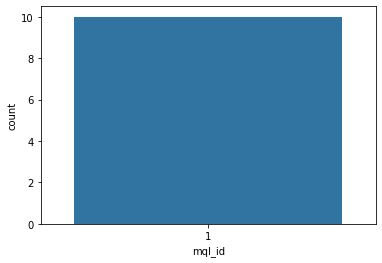

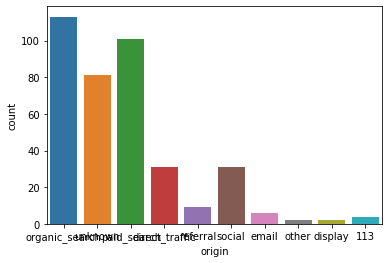

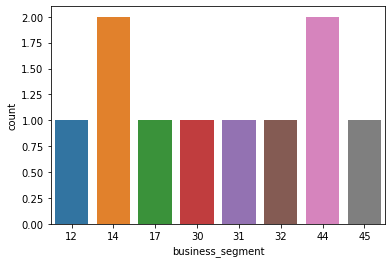

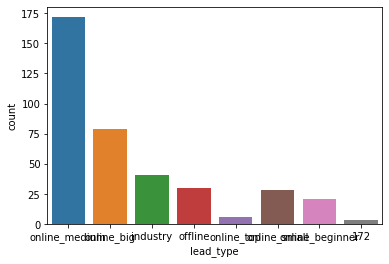

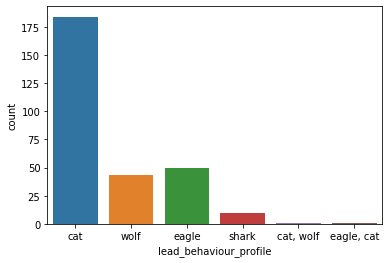

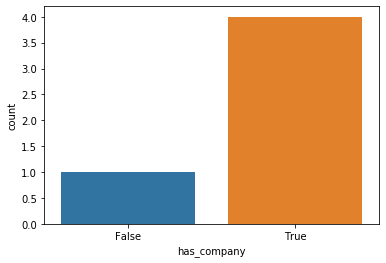

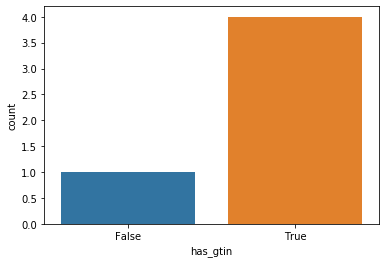

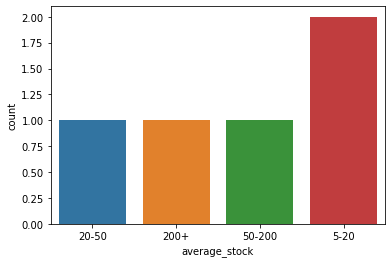

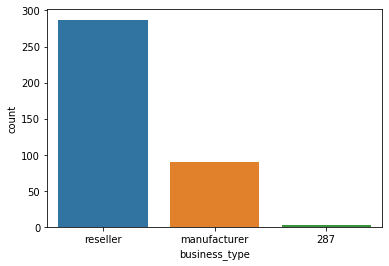

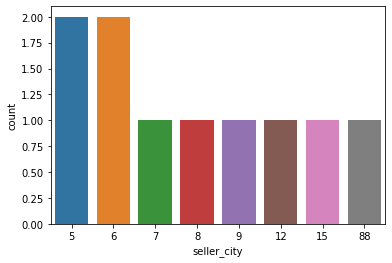

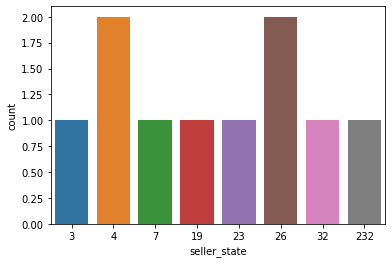

In [269]:
plot_categories(overall_leads)

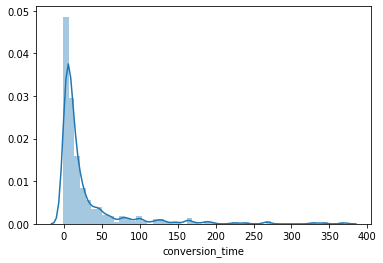

In [271]:
sns.distplot(overall_leads['conversion_time'])